In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

## 1. Dataset Preparation

In [4]:
#Load the Sklearn MNIST Dataset
digits=load_digits()

In [5]:
X=digits.data
Y=digits.target

In [6]:
print(X.shape)
print(Y.shape)

(1797, 64)
(1797,)


In [7]:
# 64 features, each image is a 8X8 image

1


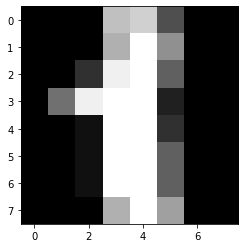

In [11]:
plt.imshow(X[1].reshape((8,8)),cmap='gray')
print(Y[1])
plt.show()

In [12]:
#discrete feature values ->multinomial naive bayes
print(X[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [13]:
#Gray scale-> one channel [0,15] ->0(black)  15(white)
#RGB img-> three channels [0,255] ->for each channel

# Train Models

In [14]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB

In [15]:
mnb=MultinomialNB()
gnb=GaussianNB()

In [17]:
#Train
mnb.fit(X,Y)
gnb.fit(X,Y)


GaussianNB(priors=None, var_smoothing=1e-09)

In [21]:
#Score
print(mnb.score(X,Y))  #higher accuracy->discrete features
print(gnb.score(X,Y))   #not continuous features

0.9053978853644964
0.8580968280467446


In [23]:
cross_val_score(gnb,X,Y,scoring="accuracy",cv=10)

array([0.76111111, 0.81666667, 0.90555556, 0.68333333, 0.73888889,
       0.83888889, 0.86666667, 0.86592179, 0.82681564, 0.81005587])

In [24]:
cross_val_score(gnb,X,Y,scoring="accuracy",cv=10).mean()

0.8113904407200497

In [25]:
#Average Accuracy-> calculated using cross validation of score

In [30]:
cross_val_score(mnb,X,Y,scoring="accuracy",cv=10).mean()

0.8797858472998138

### This is because each feature is discrete valued ! Hence MNB gives better results!